In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.signal import sosfiltfilt, butter
from scipy import io

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

### The cell below defines a butterworth bandpass filter

In [2]:
def butter_bandpass(data, fs, filt_freq, order):
    # make sure that the user provides two frequencies for bandpass filter
    try:
        # renormalize frequencies in Hz to fractional scale required by butter
        nyq = 0.5 * fs # nyquist frequency
        f0 = (filt_freq[0]/nyq)
        f1 = (filt_freq[1]/nyq)

        # highpass first
        sos = butter(order, f0, btype = 'high', analog=False, output='sos')
        y = sosfiltfilt(sos, data)

        # then lowpass
        sos = butter(order, f1, btype = 'low', analog=False, output='sos')
        y = sosfiltfilt(sos, y)
        
        return y
    
    except:
        print("filt_freq must have two frequencies for a bandpass filter")

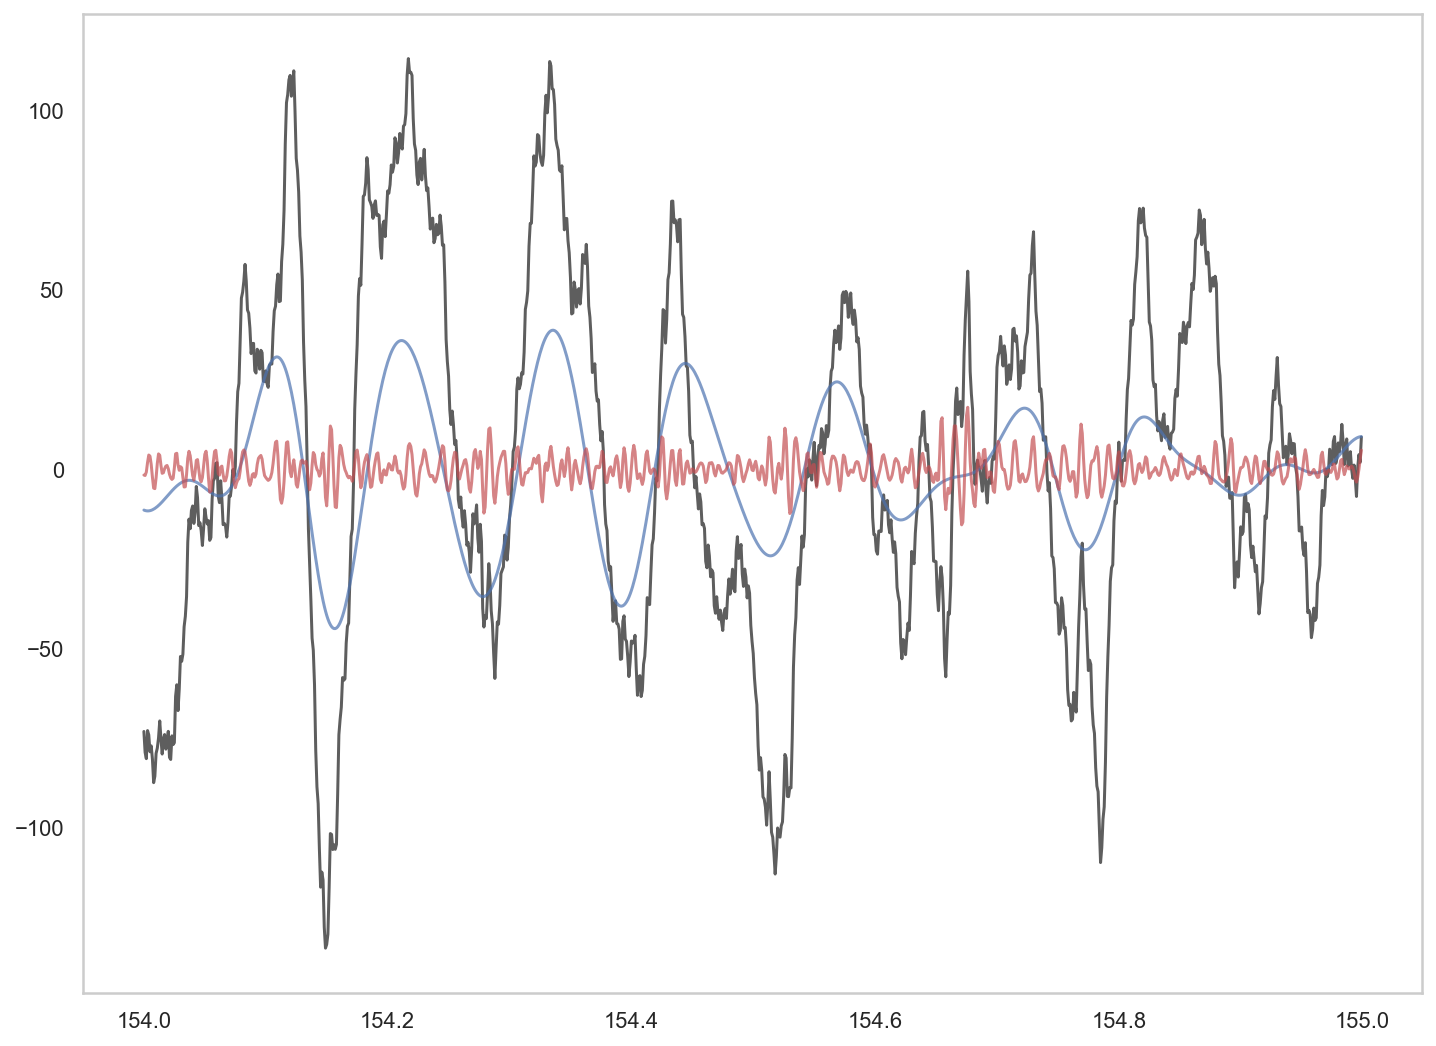

In [5]:
fs = 1000
alpha_range = [8, 12]
gamma_range = [70, 250]

# import the data
signal = io.loadmat('data/ecog_data.mat', squeeze_me=True)
signal = signal['data']
signal = np.asarray(signal)

# set the time axis
n_seconds = len(signal)/fs
times = np.arange(0, n_seconds, 1/fs)

# Bandpass filter the data
alpha_signal = butter_bandpass(signal, fs=fs, filt_freq=alpha_range, order=4)
gamma_signal = butter_bandpass(signal, fs=fs, filt_freq=gamma_range, order=4)

# Plot signal segment
segment = [154000, 155000]
plt.plot(times[segment[0]:segment[1]], signal[segment[0]:segment[1]], 'k', alpha = 0.7)
plt.plot(times[segment[0]:segment[1]], alpha_signal[segment[0]:segment[1]], 'b', alpha = 0.7)
plt.plot(times[segment[0]:segment[1]], gamma_signal[segment[0]:segment[1]], 'r', alpha = 0.7)
plt.show()


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

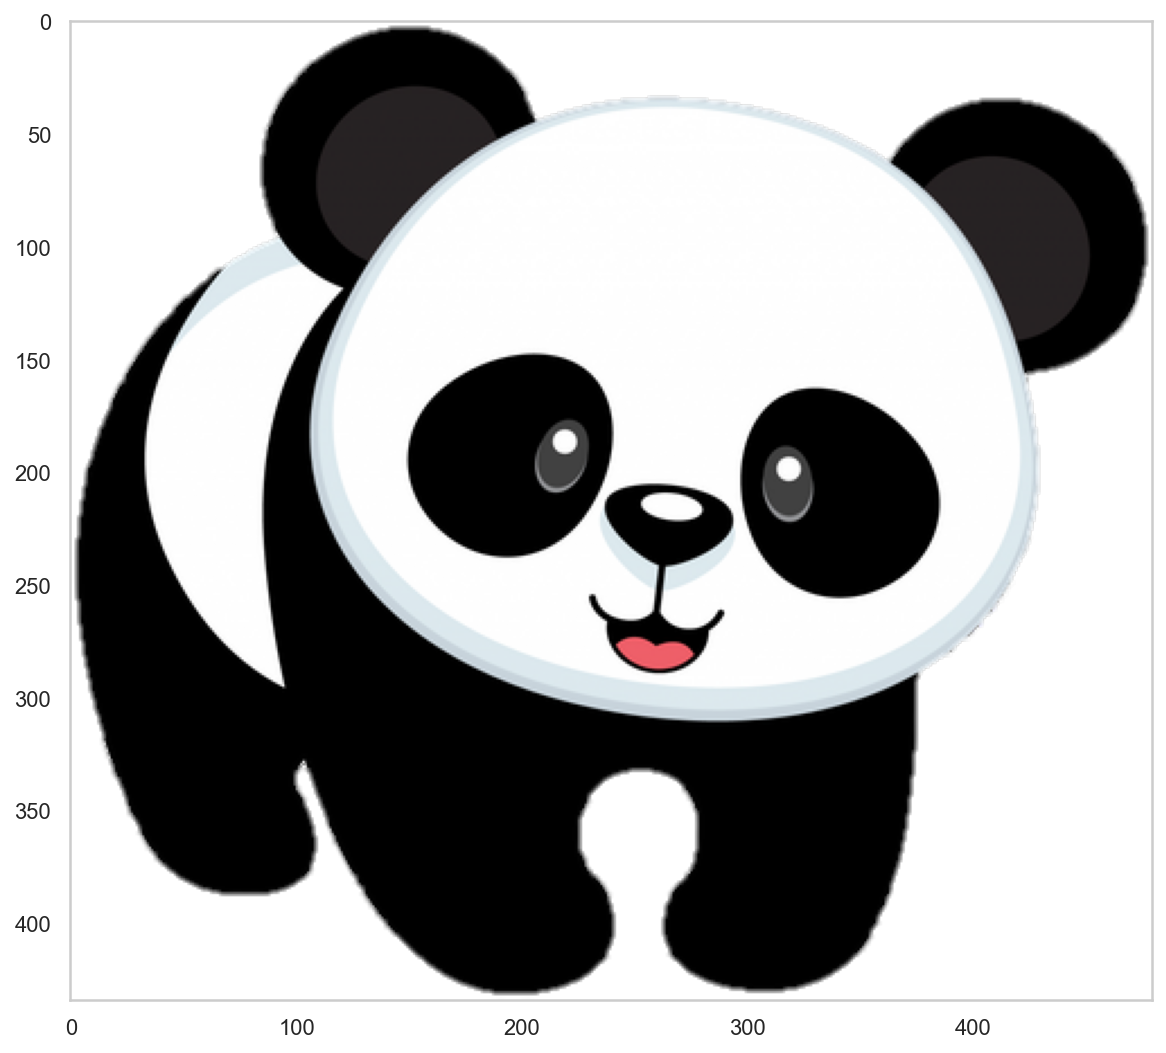

In [5]:
import matplotlib.image as mpimg

img = mpimg.imread('panda.png')
imgplot = plt.imshow(img)

kernel_blur = (1/9) * np.ones([3, 3])
img_blur = signal.convolve2d()